# Syllabus

In [1]:
import matplotlib.pyplot as plt

X = [2, 4, 4, 6, 4, 6]
y = [4, 6, 2, 4, 4, 2]
colours = [0,0,0,0,1,1]
plt.scatter(X[:-2], y[:-2], c='yellow')
plt.scatter(X[-2:], y[-2:], c='blue')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
from sklearn.neighbors import KNeighborsClassifier 
classifier=KNeighborsClassifier(n_neighbors=2, weights='distance')

In [3]:
import numpy as np
data = np.array([X,y]).reshape(-1,2)
print(data)
classifier.fit(data, colours)

[[2 4]
 [4 6]
 [4 6]
 [4 6]
 [2 4]
 [4 2]]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')

In [4]:
classifier.predict([[6, 6]])

array([0])

# Default Dataset

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [6]:
iris = sns.load_dataset('iris')
iris.dropna(axis=1, inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
from sklearn.preprocessing import LabelEncoder

iris = iris.apply(LabelEncoder().fit_transform)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0


## Plot relation between data

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


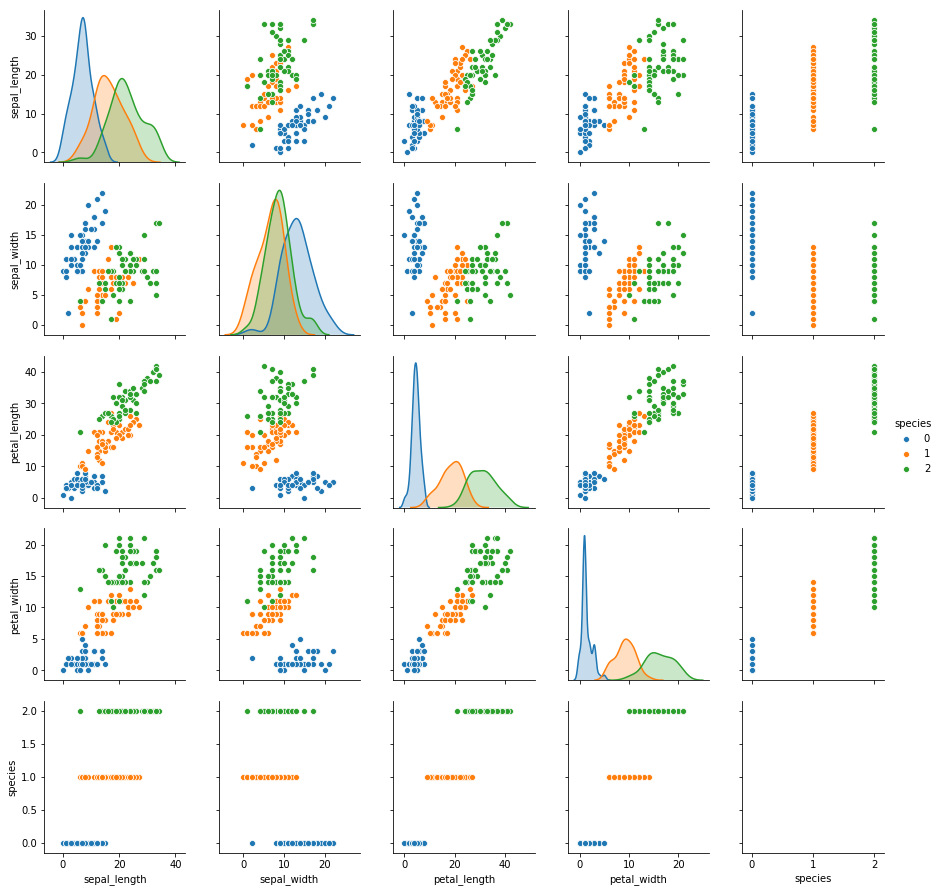

In [8]:
import seaborn as sns

sns.pairplot(iris, hue='species')
plt.show()

## Selecting two features

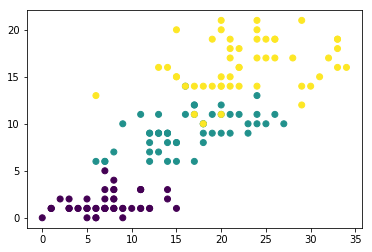

In [9]:
X = iris['sepal_length']
Y = iris['petal_width']
plt.scatter(X, Y, c= iris['species'])
plt.show()

# Create classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier 
classifier=KNeighborsClassifier(n_neighbors=3, weights='distance')

## Split data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris[['sepal_length','petal_width']],
                                                    iris['species'], test_size=0.33, random_state=13)
print(len(X_train))
print(len(X_test))

100
50


## Create classifier

In [12]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

## Accuracy

In [13]:
classifier.score(X_test, y_test)

0.92

## Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,classifier.predict(X_test))

array([[16,  0,  0],
       [ 0, 13,  1],
       [ 0,  3, 17]], dtype=int64)

## Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier,iris[['sepal_length','petal_width']], iris['species'], cv=5)
scores

array([0.93333333, 0.96666667, 0.83333333, 0.93333333, 0.93333333])